In [316]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np

from generateTestingData.useGeneratedData import makeDataUsable
from ML.Model import Predicter
from generateTestingData.useGeneratedData import NewPredicter

In [317]:
# comparingFile = "../data/comparingModels/forComparingModelsScenario.csv"
# comparingFile = "../data/comparingModels/forComparingScen1.csv"
comparingFile = "../data/comparingModels/comparing.csv"
original_df = read_csv(comparingFile)
print(len(original_df))
original_df.head()

32


,Time,TTC,DTO,JERK,Speed,asX,asY,asZ,COL
0,0.0,0.0,0.0000,0.000,0.000,0.000,0.0,0.000,0
1,0.5,50.0,6.1530,3.232,0.808,0.002,-0.0,0.002,0
2,1.0,50.0,8.0044,1.248,1.928,0.000,-0.0,0.000,0
3,1.5,50.0,10.1910,0.272,3.116,0.000,-0.0,0.000,0
4,2.0,50.0,12.1610,0.252,4.367,0.000,-0.0,0.000,0


In [318]:
# adjusted_df = read_csv("../data/comparingModels/adjusted.csv")
adjusted_df = read_csv(comparingFile)
print(len(adjusted_df))
adjusted_df.head()

32


,Time,TTC,DTO,JERK,Speed,asX,asY,asZ,COL
0,0.0,0.0,0.0000,0.000,0.000,0.000,0.0,0.000,0
1,0.5,50.0,6.1530,3.232,0.808,0.002,-0.0,0.002,0
2,1.0,50.0,8.0044,1.248,1.928,0.000,-0.0,0.000,0
3,1.5,50.0,10.1910,0.272,3.116,0.000,-0.0,0.000,0
4,2.0,50.0,12.1610,0.252,4.367,0.000,-0.0,0.000,0


In [319]:
adjusted_data = makeDataUsable(adjusted_df, 4, 1, False)
print(len(adjusted_data))
adjusted_data.head()

21


,Time,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,...,asX4,asY1,asY2,asY3,asY4,asZ1,asZ2,asZ3,asZ4,COL
0,3.0,50.0,50.000,50.000,50.000,10.1910,12.1610,13.6117,14.4238,0.272,...,0.002,-0.0,-0.0,-0.000,-0.000,0.000,0.000,0.003,0.002,0.0
1,3.5,50.0,50.000,50.000,50.000,12.1610,13.6117,14.4238,14.5594,0.252,...,0.000,-0.0,-0.0,-0.000,-0.000,0.000,0.003,0.002,0.000,0.0
2,4.0,50.0,50.000,50.000,12.476,13.6117,14.4238,14.5594,13.9984,0.376,...,0.000,-0.0,-0.0,-0.000,-0.000,0.003,0.002,0.000,0.000,0.0
3,4.5,50.0,50.000,12.476,5.132,14.4238,14.5594,13.9984,12.7556,0.004,...,0.000,-0.0,-0.0,-0.000,-0.001,0.002,0.000,0.000,0.000,0.0
4,5.0,50.0,12.476,5.132,2.751,14.5594,13.9984,12.7556,10.7941,0.036,...,0.000,-0.0,-0.0,-0.001,-0.001,0.000,0.000,0.000,0.000,0.0


<AxesSubplot:>

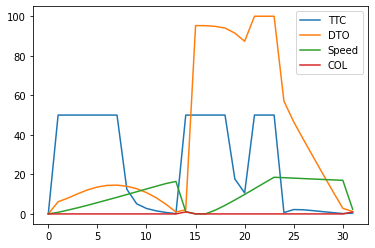

In [342]:
adjusted_df[[adjusted_df.columns[1], adjusted_df.columns[2], adjusted_df.columns[4], adjusted_df.columns[-1]]].plot()

In [321]:
modelsDeep = [
    "MLPClassifier_deep_572-21-27-190",
    "RandomForestClassifier_deep_580-13-27-190",
    "SVC_deep_581-12-72-145",
    # "oldModels/SVC_deep_582-11-70-147",
    "XGBClassifier_deep_578-15-21-196"
]

modelsGen = [
    "MLPClassifier_gen_PI4_RBC5_75-34-22-68",
    "RandomForestClassifier_gen_PI4_RBC5_82-34-15-68",
    "SVC_gen_PI4_RBC5_82-38-15-64",
    "XGBClassifier_gen_PI4_RBC5_82-15-27-75"
]



In [322]:
def getPredsGen(models, comparingDF):
    infoDict = {}
    times = []
    cols = []
    dto = []
    for model in models:
        infoDict[model] = {"model": NewPredicter.loadModel(model), "predictions": []}

    for _, row in comparingDF.iterrows():
        cols.append(row.to_list()[-1])
        dto.append(row.to_list()[8])
        for model in infoDict:
            m = infoDict[model]["model"]
            p = m.predict(m.preProcess(row.to_list()[1:-1]))[0]
            infoDict[model]["predictions"].append(p)
    infoDict["cols"] = cols
    infoDict["dto"] = dto
    time = 0
    while len(cols) > len(times):
        times.append(time)
        time += 0.5
    infoDict["times"] = times
    return infoDict

dd_Gen = getPredsGen(modelsGen, adjusted_data)

Model loaded!
Model loaded!
Model loaded!
Model loaded!


In [323]:
print(len(dd_Gen["cols"]))
print(len(dd_Gen["times"]))

21
21


In [345]:
def getPredsDeep(models, comparingDF):
    infoDict = {}
    times = []
    cols = []
    dto = []
    for model in models:
        infoDict[model] = {"model": Predicter(), "predictions": []}
        infoDict[model]["model"].loadModel(model)

    # columns = comparingDF.columns[2:-1]
    for i, row in comparingDF.iterrows():
        if row.to_list()[0] < 2.5: continue
        cols.append(row.to_list()[-1])
        dto.append(row.to_list()[2])
        dataRow = []
        dataRow.append(row["DTO"])
        dataRow.append(row["JERK"])

        for column in comparingDF.columns[4:-1]:
            dataRow += comparingDF[column][i-5:i+1].to_list()
        for model in infoDict:
            m = infoDict[model]["model"]
            p = m.predict(m.preProcess(dataRow)[0])[0]
            infoDict[model]["predictions"].append(p)
        prevTime =row.to_list()[0]

    infoDict["cols"] = cols
    infoDict["dto"] = dto
    time = 0
    while len(infoDict["cols"]) > len(times):
        times.append(time)
        time += 0.5
    infoDict["times"] = times
    return infoDict

dd_Deep = getPredsDeep(modelsDeep, adjusted_df)

Model loaded!
Model loaded!
Model loaded!
Model loaded!


In [346]:
for k, v in dd_Gen.items():
    print(k)
    if len(v) == 2:
        print(len(dd_Gen[k]["predictions"]))
    print(v)

MLPClassifier_gen_PI4_RBC5_75-34-22-68
21
{'model': <generateTestingData.useGeneratedData.NewPredicter object at 0x00000211BC37E580>, 'predictions': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]}
RandomForestClassifier_gen_PI4_RBC5_82-34-15-68
21
{'model': <generateTestingData.useGeneratedData.NewPredicter object at 0x00000211BE7BF2B0>, 'predictions': [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
SVC_gen_PI4_RBC5_82-38-15-64
21
{'model': <generateTestingData.useGeneratedData.NewPredicter object at 0x00000211BC37E730>, 'predictions': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]}
XGBClassifier_gen_PI4_RBC5_82-15-27-75
21
{'model': <generateTestingData.useGeneratedData.NewPredicter object at 0x00000211BEB74970>, 'predictions': [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]}
cols
[0.0, 0.0, 0.0

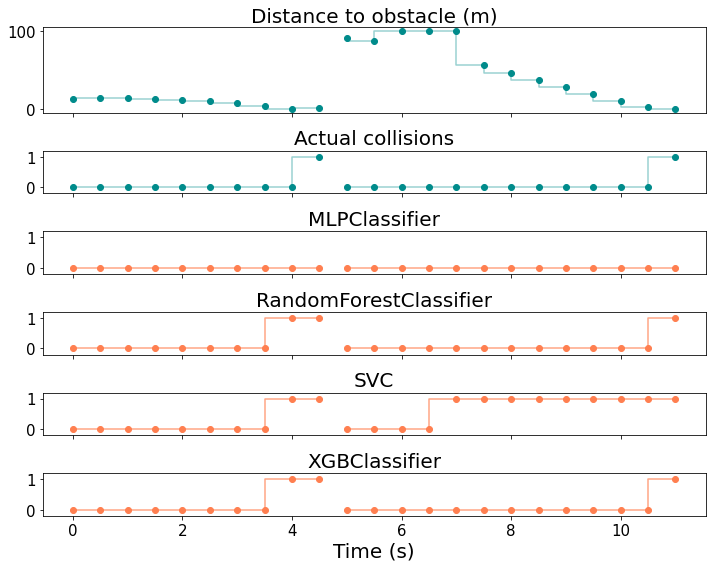

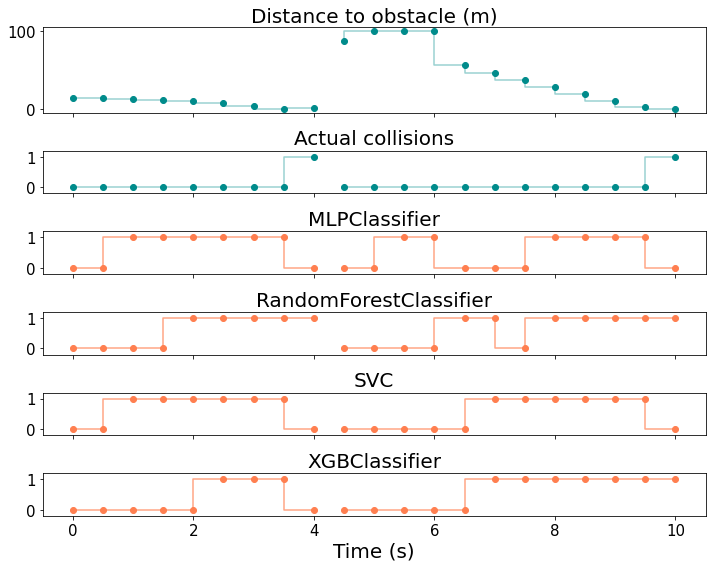

In [347]:
def plotCompare(data, both=False, saveFig=False, filename="plotCompare", splice=10):
    titleSize = 25
    subTitleSize = 20
    tickSize = 15
    labelSize = 20

    if both:
        plots = sum((len(d)-1 for d in data))
    else:
        plots = len(data)-1

    fig, ax = plt.subplots(plots, figsize=(10, plots+2), sharex=True, sharey=False, gridspec_kw={"height_ratios": [2,1,1,1,1,1]})
    plt.subplots_adjust(bottom=0.5)
    ax[0].step(data["times"][:splice], data["dto"][:splice], color="darkcyan", alpha=0.4)
    ax[0].step(data["times"][splice:], data["dto"][splice:], color="darkcyan", alpha=0.4)
    ax[0].scatter(data["times"], data["dto"], color="darkcyan", marker="o", alpha=1)
    ax[0].set_title("Distance to obstacle (m)", fontsize=subTitleSize)
    
    def addAxes(dataDict, i):
        ax[i].step(dataDict["times"][:splice], dataDict["cols"][:splice], color="darkcyan", alpha=0.4)
        ax[i].step(data["times"][splice:], data["cols"][splice:], color="darkcyan", alpha=0.4)
        ax[i].scatter(dataDict["times"], dataDict["cols"], color="darkcyan", marker="o", alpha=1)
        ax[i].set_title("Actual collisions", fontsize=subTitleSize)
        i += 1
        for k in dataDict:
            if k in ["dto", "times", "cols"]: continue
            ax[i].step(dataDict["times"][:splice], dataDict[k]["predictions"][:splice], color="coral", alpha=0.7)
            ax[i].step(dataDict["times"][splice:], dataDict[k]["predictions"][splice:], color="coral", alpha=0.7)
            ax[i].scatter(dataDict["times"], dataDict[k]["predictions"], color="coral", marker="o", alpha=1)
            ax[i].set_title(k[:k.find("_")], fontsize=subTitleSize)
            i += 1

    if not both:
        addAxes(data, 1)
    else:
        i = 1
        for d in data:
            addAxes(d, i)
            i += len(d)-1

    # ax[0].set_yscale('log')
    ax[0].yaxis.set_tick_params(labelsize=tickSize)
    for axis in ax[1:]:
        axis.set_ylim([-0.2, 1.2])
        axis.yaxis.set_tick_params(labelsize=tickSize)

    ax[-1].xaxis.set_tick_params(labelsize=tickSize)
    ax[-1].set_xlabel("Time (s)", fontsize=labelSize)
    fig.tight_layout(h_pad=1)

    if saveFig:
        plt.savefig(f"../data/figures/{filename}")

    
plotCompare(dd_Deep, False, saveFig=True, filename="deepResults", splice=10)
plotCompare(dd_Gen, False, saveFig=True, filename="genResults", splice=9)
# plotCompare((dd_Deep, dd_Gen), True, saveFig=True, filename="testCompare")

In [327]:
# def getScores(data):
#     # print(data)
#     for model, info in data.items():
#         if model in ["dto", "times", "cols"]: continue
#         print()
#         print(model)
#         info["model"].getScore(data["cols"], info["predictions"])
#         # print(model)
#         # calculateScores(info["predictions"], data["cols"])


# getScores(dd_Gen)
# getScores(dd_Deep)

In [328]:
# original_df["DTO"][2:4]

In [329]:
# for k in md:
#     print(k)
#     print(md[k]["predictions"])
#     # print(len(md[k]["predictions"]))

# d = {"time": times, "cols": cols, "preds": md["XGBClassifier_gen_PI4_RBC5_74-23-32-70"]["predictions"]}
# df = DataFrame(d)
# df[["cols", "preds"]].plot()
# df

In [330]:
# prev = times[0]
# counter = times[0]
# for t in times:
#     print(t, counter)
#     while t-counter >= 0.5:
#         print("add time")
#         counter += 0.5
#     counter += 0.5
#     prev = t

# fixedTime = [t for t in np.arange(times[0], times[-1], 0.5)]
# print(fixedTime)
# print(len(fixedTime))

In [331]:
# nytt = times.copy()
# for i, t in enumerate(fixedTime):
#     print(t, i, t-0.5, nytt[i])
#     v = nytt[i]
#     k = i
#     while t-0.5 < v:
#         print("hey")
#         # nyVal = 
#         nytt.insert(k, v+0.5)
#         k += 1
#         v += 0.5 

In [332]:
# def plotCompare1(x, y, title):
#         sizes = {
#                 "figureSize" : (15,2),
#                 "ticks" : 10,
#                 "font_s" : 5,
#                 "label" : 10,
#                 "title" : 10,
#                 "lines" : 2
#                 }

#         plt.figure(figsize=sizes["figureSize"])

#         plt.scatter(x, y, linewidth=sizes["lines"])
#         plt.step(x, y, where="pre", linewidth=sizes["lines"])
#         # plt.plot(times, cols, label="collisions", color="green", linewidth=sizes["lines"])

#         plt.xlabel(f"Time", fontsize=sizes["label"])
#         plt.xticks(fontsize=sizes["ticks"])
#         plt.yticks(fontsize=sizes["ticks"])
#         # plt.legend(fontsize=sizes["font_m"])
#         plt.grid()
#         plt.title(title, fontsize=sizes["title"])
#         plt.show()

# plotCompare1(dd_Gen["times"], dd_Gen["cols"], "Collisions")

# for model in dd_Gen:
#     if model in ["times", "cols"]:
#         continue
#     plotCompare1(dd_Gen["times"], dd_Gen[model]["predictions"], model)
# #     print(k)
# #     print(md[model]["predictions"])
# #     # print(len(md[k]["predictions"]))
        